# REGULARIZED LOGISTIC REGRESSION

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### load data

In [2]:
data = pd.read_csv("ex2data2.txt",header=None)
X = data.iloc[:,0:3].values
y = data.iloc[:,-1].values

In [3]:
data.head()

,0,1,2
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
0,118.0,0.054779,0.496654,-0.83007,-0.372120,-0.006336,0.478970,1.0709
1,118.0,0.183102,0.519743,-0.76974,-0.254385,0.213455,0.646562,1.1089
2,118.0,0.491525,0.502060,0.00000,0.000000,0.000000,1.000000,1.0000


## plot the data

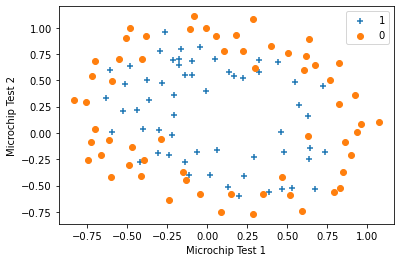

In [18]:
# Find Indices of Positive and Negative Examples
pos = (y==1)
neg = (y==0)
plt.scatter(data[pos][0],data[pos][1],marker ="+")
plt.scatter(data[neg][0],data[neg][1],marker ="o")
plt.xlabel("Microchip Test 1")
plt.ylabel("Microchip Test 2")
plt.legend(["1","0"])
plt.show()

### we will map the features into all polynomial terms of x1 and x2 up to the sixth power

In [6]:
def mapFeature(X1, X2, degree):
    degree = degree  
    new_df =[]
    ones = pd.DataFrame(np.ones(len(X1)).reshape(len(X1),1))
    for i in range(1,degree+1):
        for j in range(i+1):
            out = (X1**(i-j))*(X2**j)
            new_df.append(out)   
    new_df=pd.DataFrame(new_df)
    new_df=new_df.T
    frames = [ones,new_df]
    new_df = pd.concat(frames,ignore_index=True,axis=1)
    new_df=new_df.values
    return new_df   

### define sigmoid function

In [7]:
def sigmoid(z):
    g = np.size(z);
    g = 1 / (1+np.exp(-z))
    return g

### define cost function and gradient

<img src="regularized_logistic_regression_cost_function.PNG" width="500" height="300">

<img src="regularized_logistic_regression_gradient_1.PNG" width="400" height="300">

<img src="regularized_logistic_regression_gradient_2.PNG" width="400" height="300">

In [8]:
# you should not be regularizing the theta(1) parameter (which corresponds to θ0) in the code.
def costFunction(X, y, theta, Lambda):
    m = len(y)
    grad = np.zeros(len(theta))
    predictions = sigmoid(X @ theta) # predictions of hypothesis on all examples
    reg_J = ((1/m) * (np.sum( -y * np.log(predictions)-(1-y) * np.log(1-predictions)))) + Lambda/(2*m) * sum(theta[1:,]**2)
    grad_0 = 1/m*(X.T @ (predictions-y))[0]
    grad_1 = 1/m*(X.T @ (predictions-y))[1:] + Lambda/(m)* theta[1:]
    grad[0] = grad_0
    grad[1:] = grad_1
    return reg_J, grad

In [9]:
# costFunctionReg function using the initial value of θ (initialized to all zeros)
# Initialize fitting parameters
X_poly = mapFeature(X[:,0], X[:,1],6)
initial_theta = np.zeros(X_poly.shape[1])

# Set regularization parameter lambda to 1
Lambda = 1

In [10]:
costFunction(X_poly, y, initial_theta, Lambda)

(0.6931471805599454,
 array([8.47457627e-03, 1.87880932e-02, 7.77711864e-05, 5.03446395e-02,
        1.15013308e-02, 3.76648474e-02, 1.83559872e-02, 7.32393391e-03,
        8.19244468e-03, 2.34764889e-02, 3.93486234e-02, 2.23923907e-03,
        1.28600503e-02, 3.09593720e-03, 3.93028171e-02, 1.99707467e-02,
        4.32983232e-03, 3.38643902e-03, 5.83822078e-03, 4.47629067e-03,
        3.10079849e-02, 3.10312442e-02, 1.09740238e-03, 6.31570797e-03,
        4.08503006e-04, 7.26504316e-03, 1.37646175e-03, 3.87936363e-02]))

### Apply Gradient Descent

In [11]:
def gradientDescent(X, y, theta, alpha, num_iters, Lambda):
    m = len(y); # number of training examples
    J_history = np.zeros((num_iters, 1));
    for i in range(num_iters):
        J, grad = costFunction(X, y, theta, Lambda)
        theta = theta - alpha * grad 
        J_history[i] = J
    return theta, J_history  # return theta and J_history

In [12]:
theta, J_history = gradientDescent(X_poly,y,initial_theta, 0.1, 1000, 1)

### Plotting of Cost Function

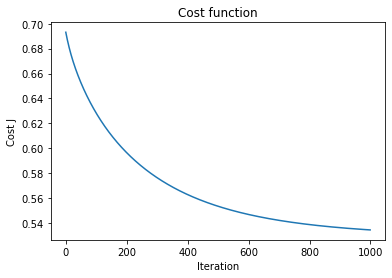

In [13]:
plt.plot(J_history)
plt.xlabel("Iteration")
plt.ylabel("Cost J")
plt.title("Cost function")
plt.show()

### Best Fit decision boundary

In [14]:
def mapFeaturePlot(X1, X2, degree):
    degree = degree  
    new_df =[]
    ones = pd.DataFrame(np.ones(1))
    for i in range(1,degree+1):
        for j in range(i+1):
            out = (X1**(i-j))*(X2**j)
            new_df.append(out)   
    new_df=pd.DataFrame(new_df)
    new_df=new_df.T
    frames = [ones,new_df]
    new_df = pd.concat(frames,ignore_index=True,axis=1)
    new_df=new_df.values
    return new_df   

In [15]:
# Here is the grid range
u = np.linspace(-1, 1.5, 50)
v = np.linspace(-1, 1.5, 50)

z = np.zeros((len(u), len(v)))

In [16]:
# Evaluate z = theta*x over the grid
for i in range(len(u)):
        for j in range(len(v)):
            z[i,j] = mapFeaturePlot(u[i], v[j], 6 ) @ theta;

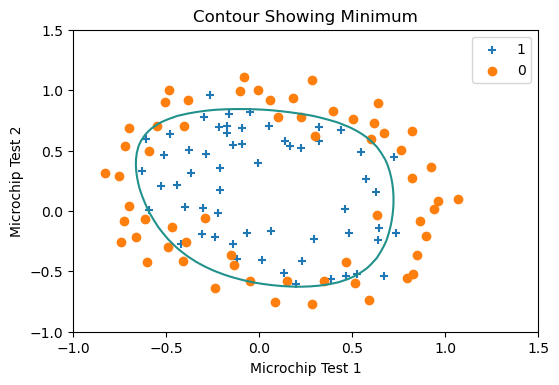

In [22]:
z = z.T # important to transpose z before calling contour
plt.figure(dpi=100)
plt.scatter(data[pos][0],data[pos][1],marker ="+")
plt.scatter(data[neg][0],data[neg][1],marker ="o")
plt.legend(["1","0"])
X_contour, Y_contour = np.meshgrid(u, v)
plt.contour(X_contour,Y_contour,z, 0)
plt.xlabel("Microchip Test 1")
plt.ylabel("Microchip Test 2")
plt.title("Contour Showing Minimum")
plt.show()

# Overfitting

In [23]:
# with λ too small our model will overfit training data

In [24]:
theta_overfit, J_history = gradientDescent(X_poly,y,initial_theta, 5, 1000, 0)

In [25]:
# Evaluate z = theta*x over the grid
for i in range(len(u)):
        for j in range(len(v)):
            z[i,j] = mapFeaturePlot(u[i], v[j], 6 ) @ theta_overfit   

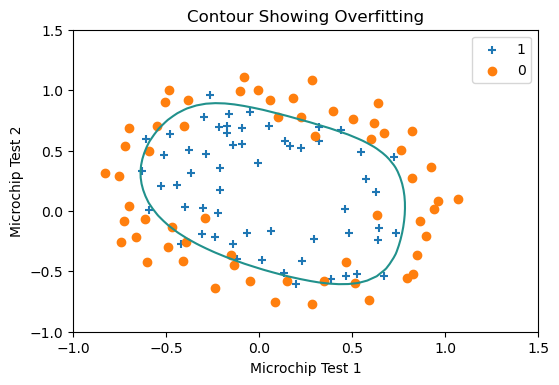

In [26]:
z = z.T # important to transpose z before calling contour
plt.figure(dpi=100)
plt.scatter(data[pos][0],data[pos][1],marker ="+")
plt.scatter(data[neg][0],data[neg][1],marker ="o")
plt.legend(["1","0"])
X_contour, Y_contour = np.meshgrid(u, v)
plt.contour(X_contour,Y_contour,z, 0)
plt.xlabel("Microchip Test 1")
plt.ylabel("Microchip Test 2")
plt.title("Contour Showing Overfitting")
plt.show()

# UNDERFIT

In [27]:
# with λ too big our model will overfit training data

In [28]:
theta_underfit, J_history = gradientDescent(X_poly,y,initial_theta, 0.1, 1000, 100)

In [29]:
# Evaluate z = theta*x over the grid
for i in range(len(u)):
        for j in range(len(v)):
            z[i,j] = mapFeaturePlot(u[i], v[j], 6 ) @ theta_underfit   

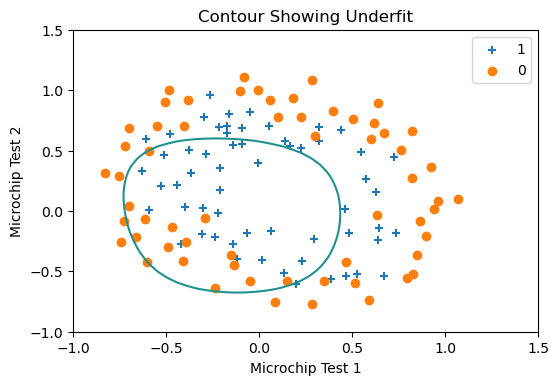

In [30]:
z = z.T # important to transpose z before calling contour
plt.figure(dpi=100)
plt.scatter(data[pos][0],data[pos][1],marker ="+")
plt.scatter(data[neg][0],data[neg][1],marker ="o")
plt.legend(["1","0"])
X_contour, Y_contour = np.meshgrid(u, v)
plt.contour(X_contour,Y_contour,z, 0)
plt.xlabel("Microchip Test 1")
plt.ylabel("Microchip Test 2")
plt.title("Contour Showing Underfit")
plt.show()